# Preprocessing

- X -> all the data is input features because this is data for clustering

In [ ]:
import pandas as pd
df=pd.read_csv("../data/diamonds.csv")

# PREPROCESSING

In [2]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [5]:
df.shape

(53940, 10)

In [6]:
X = df

## Categorical Data Handling

- Because no data description given, lets assume that all categorical features are nominal

## ONE-HOT ENCODING

In [7]:
df.shape

(53940, 10)

In [8]:
df_ohe = pd.get_dummies(df, columns = ['cut','color','clarity'])

In [9]:
df_ohe.shape

(53940, 27)

In [10]:
df_ohe.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [11]:
df_ohe.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False


# Check Missing values

In [12]:
df_ohe.isnull().sum()

carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

# Remove duplicate rows

# Drop repeated rows



In [13]:
df_ohe.shape

(53940, 27)

In [14]:
df_ohe.drop_duplicates(inplace=True)

In [15]:
df_ohe.shape

(53794, 27)

In [16]:
# standardizing the data / z-score normalization
df_ohe_std = (df_ohe - df_ohe.mean())/ df_ohe.std()

# DBSCAN

- we need standard scaled data

- and clean data ( no string columns are allowed )

- detecting outliers

In [17]:
X = df_ohe_std

In [18]:
X.shape

(53794, 27)

## Find the appropriate eps value

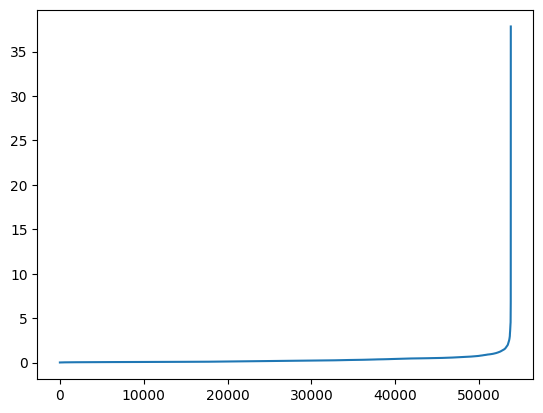

In [19]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
# eps = 0.5 , 1 , 2 #min_samples = 10, 50, 100
dbs = DBSCAN(eps = 2, min_samples= 10)
y_pred = dbs.fit_predict(X)

# using pca to plot the graph for outliers detected and clusters

In [22]:
from sklearn.decomposition import PCA

# Assume X is your original dataset (e.g., features from a dataframe)
# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


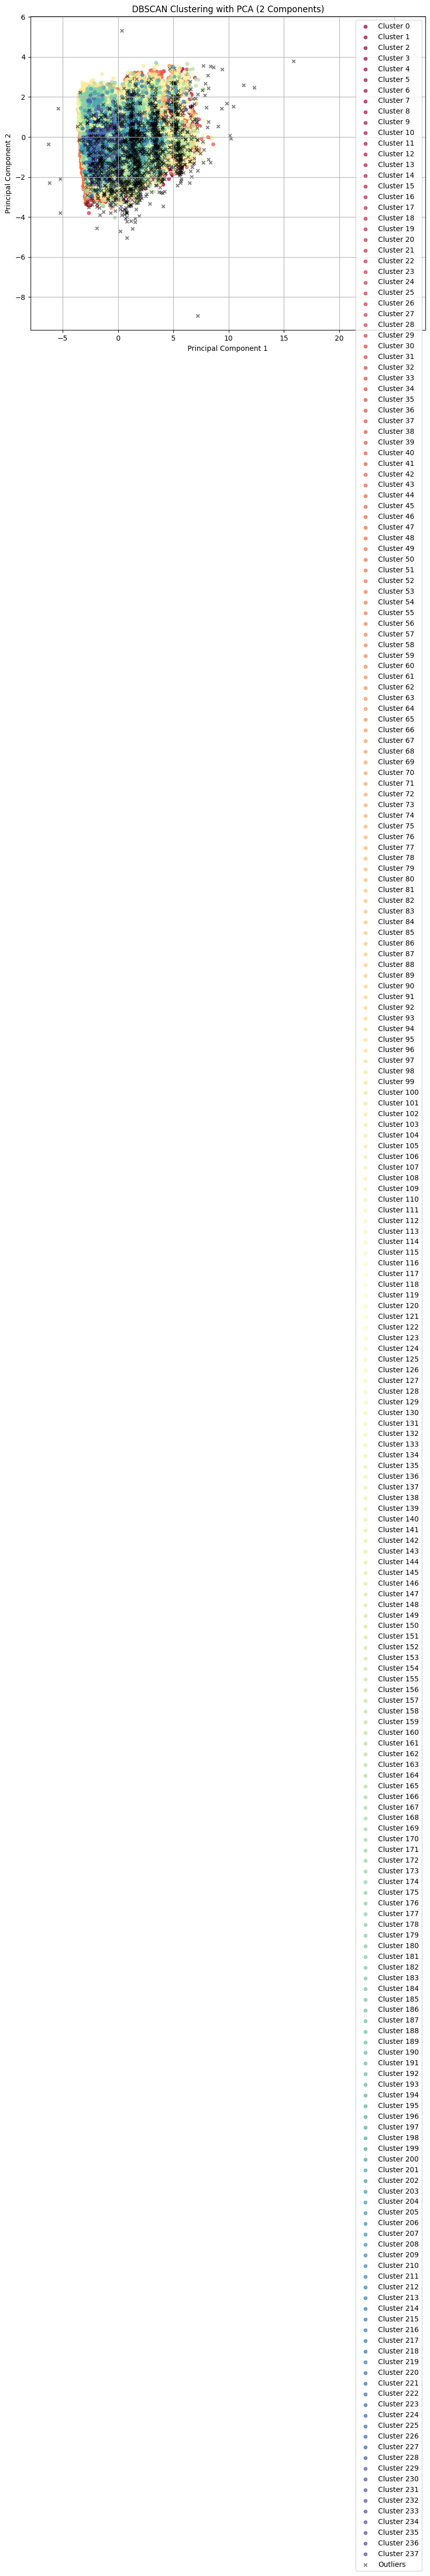

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Get unique cluster labels, excluding -1 for outliers
unique_labels = set(y_pred)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1: # Outliers
        # Use a distinct color (e.g., black) and marker for outliers
        plt.scatter(X_pca[y_pred == k, 0], X_pca[y_pred == k, 1], c='black', marker='x', s=20, label='Outliers', alpha=0.5)
    else: # Normal clusters
        plt.scatter(X_pca[y_pred == k, 0], X_pca[y_pred == k, 1], c=[col], s=20, label=f'Cluster {k}', alpha=0.7)

plt.title('DBSCAN Clustering with PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
X.shape

(53794, 27)

In [25]:
y_pred.shape

(53794,)

In [26]:
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))

Number of clusters: 238
Outliers : 1400


In [27]:
# calculate percentage of outliers
len(y_pred[np.where(y_pred == -1)]) / y_pred.shape[0] * 100

2.602520727218649

## After DBSCAN conclusion is

we have 1400 outliers detected

We can remove them / impute as neccessary.



- USING IQR

In [29]:
def impute_outlier_iqr(df,col):
    q1,q3 = df[col].quantile([0.25,0.75])
    iqr = q3 -q1
    min_val_value = q1 - 1.5 * iqr
    max_val_value = q3 + 1.5 * iqr

    df.loc[df[col]>max_val_value, col] =max_val_value
    df.loc[df[col]<min_val_value, col] =min_val_value
    return df

Box plots showing potential outliers (before IQR imputation):


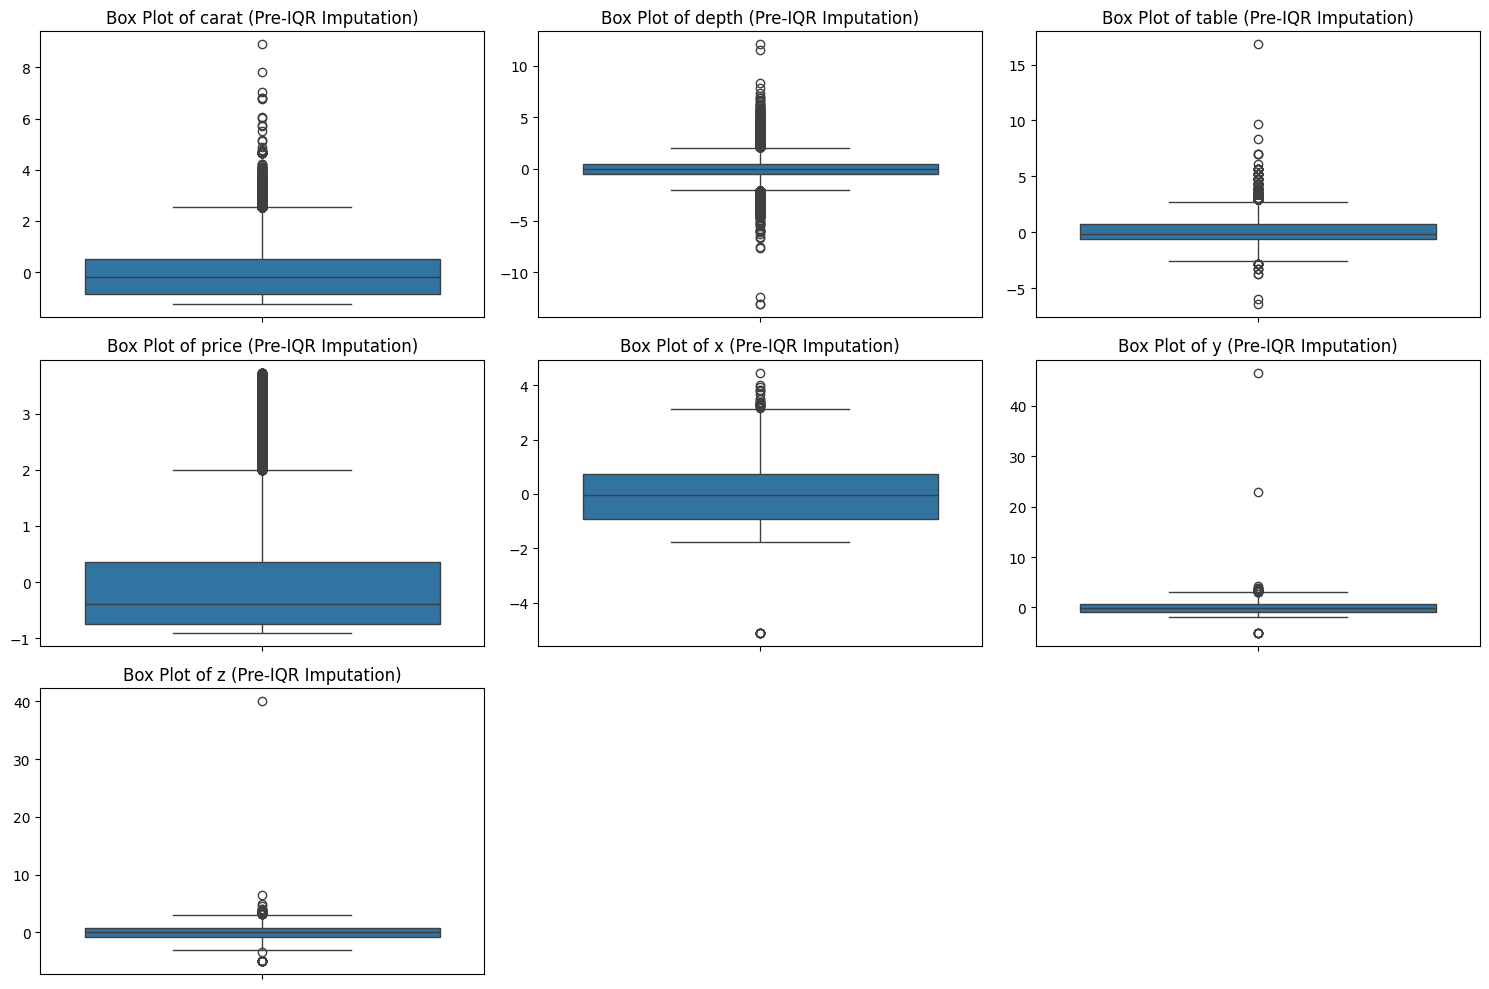


DataFrame statistics after IQR imputation:


,carat,depth,table,price,x,y,z
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,-0.011216,0.000023,-0.008281,-0.050177,0.000082,-0.001100,-0.000369
std,0.964730,0.887918,0.967457,0.861738,0.998522,0.973594,0.981272
min,-1.262764,-2.096692,-2.667397,-0.904454,-3.360607,-3.281303,-3.274597
25%,-0.840279,-0.523166,-0.652783,-0.747738,-0.911233,-0.889104,-0.891745
50%,-0.206553,0.036310,-0.205092,-0.384158,-0.027853,-0.021603,-0.012359
75%,0.511671,0.525852,0.690292,0.349460,0.721682,0.705696,0.696823
max,2.539596,2.099378,2.704906,1.995256,3.171056,3.097895,3.079675


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numerical_cols are the first 7 columns as before
numerical_cols = df_ohe_std.columns[0:7]

print("Box plots showing potential outliers (before IQR imputation):")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df_ohe_std[col])
    plt.title(f'Box Plot of {col} (Pre-IQR Imputation)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Apply the impute_outlier_iqr function to a copy of df_ohe_std
df_iqr_imputed = df_ohe_std.copy()
for col in numerical_cols:
    df_iqr_imputed = impute_outlier_iqr(df_iqr_imputed, col)

print("\nDataFrame statistics after IQR imputation:")
display(df_iqr_imputed[numerical_cols].describe())

In [32]:
# Matrix for db_scane
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)


0.3601244896488042